# Polygon Simplification

* The polygon's boundary points are usually part of the mesh
* Some meshing algorithms don't like close boundary points and, e.g., create a lot of equally close points in this area.

In [46]:
import os


def out_path(filename):
    path = "./03_out/"
    os.makedirs(path, exist_ok=True)
    return os.path.join(path, filename)

In [47]:
from pcpptc import PolygonInstance
from pcpptc.instance_converter import RotatingRegularSquare, RotatingRegularHexagonal
from pcpptc.instance_converter.dmsh import DmshGrid

from pcpptc.plot import setup_plot, plot_polygon_instance
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

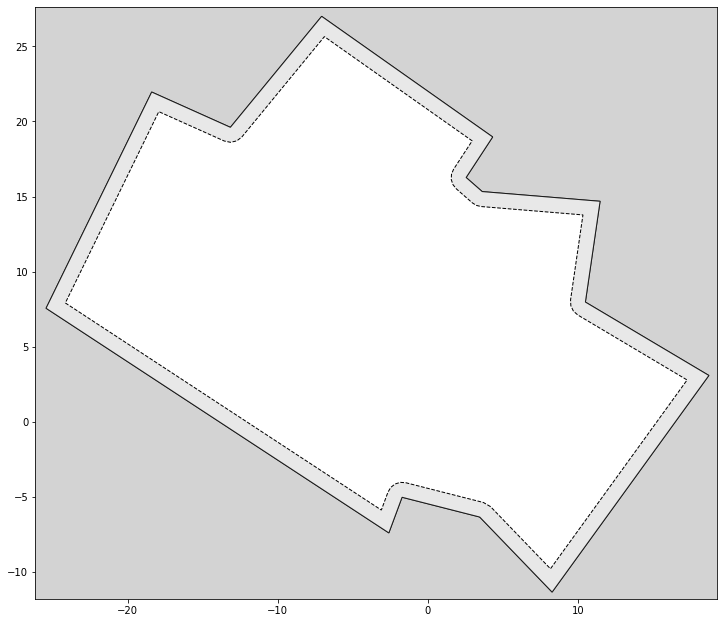

In [48]:
from pcpptc.plot.intermediate import plot_graph

pi = PolygonInstance.from_json(file_path="./01b_instance.json")
ax = setup_plot()
plot_polygon_instance(ax, pi, plot_valuable_areas=False)
plt.show()

In [49]:
figsize = (3.5, 3.5)

<Figure size 432x288 with 0 Axes>

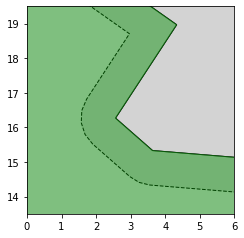

In [54]:
from pcpptc.instance_converter.dmsh import GmshGrid

# TODO: Mesh
t = GmshGrid(
    full_coverage=True,
    point_based=False,
    buffer=0.1,
    simplification=0.1,
    quad=True,
    alg=8,
)
gi4 = t(pi)

using gmesh with Frontal-Delaunay for Quads
Good options are 1, 4, and 9.


<Figure size 432x288 with 0 Axes>

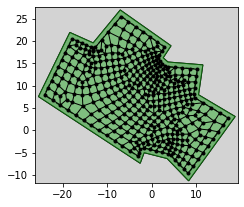

In [56]:
ax = setup_plot(figsize=figsize)
# ax = setup_plot()
plot_polygon_instance(ax, pi)
plot_graph(ax, gi4.graph, marker=".", vertex_color="black", edge_color="black")
plt.tight_layout()
plt.savefig(out_path("problematic_mesh.pdf"))
plt.show()

In [ ]:
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi, plot_valuable_areas=True)
plt.xlim(0, 6)
plt.ylim(13.5, 19.5)
area = pi.feasible_area
area = area.buffer(0.0)
# area = area.simplify(0.1)
points = area.exterior.coords
plt.tight_layout()
plt.savefig(out_path("concave_corner.pdf"))
plt.show()

<Figure size 432x288 with 0 Axes>

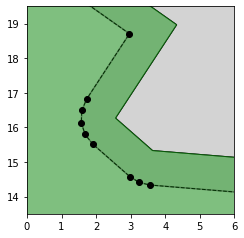

In [51]:
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi, plot_valuable_areas=True)
plt.xlim(0, 6)
plt.ylim(13.5, 19.5)
area = pi.feasible_area
area = area.buffer(0.0)
# area = area.simplify(0.1)
points = area.exterior.coords
plt.scatter([p[0] for p in points], [p[1] for p in points], zorder=3, color="black")
plt.plot(
    [p[0] for p in points], [p[1] for p in points], zorder=3, color="black", alpha=0.3
)
plt.tight_layout()
plt.savefig(out_path("problem.pdf"))
plt.show()

<Figure size 432x288 with 0 Axes>

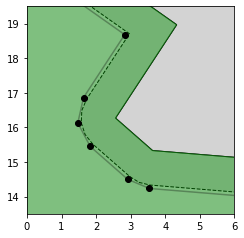

In [52]:
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi, plot_valuable_areas=True)
plt.xlim(0, 6)
plt.ylim(13.5, 19.5)
area = pi.feasible_area
area = area.buffer(-0.1)
area = area.simplify(0.1)
points = area.exterior.coords
plt.scatter([p[0] for p in points], [p[1] for p in points], zorder=3, color="black")
plt.plot(
    [p[0] for p in points], [p[1] for p in points], zorder=3, color="black", alpha=0.3
)
plt.tight_layout()
plt.savefig(out_path("simplify.pdf"))
plt.show()

<Figure size 432x288 with 0 Axes>

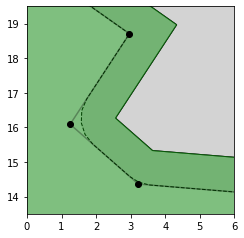

In [53]:
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi, plot_valuable_areas=True)
plt.xlim(0, 6)
plt.ylim(13.5, 19.5)
area = pi.original_area
area = area.buffer(-pi.tool_radius, cap_style=2, join_style=2)
area = area.simplify(0.1)
points = area.exterior.coords
plt.scatter([p[0] for p in points], [p[1] for p in points], zorder=3, color="black")
plt.plot(
    [p[0] for p in points], [p[1] for p in points], zorder=3, color="black", alpha=0.3
)
plt.tight_layout()
plt.savefig(out_path("shrink.pdf"))
plt.show()